## Points of Dispense Analysis

##### Maxwell Kennady, Nora Murray, Elizabeth Speigle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
distances = pd.read_csv('data/OD_Pairs_Distances.csv')
population = pd.read_excel('data/BG_master.xlsx')
bg_included = pd.read_csv('data/bg_pop_included.csv')

In [34]:
dist_miles = distances.pivot(index='block_group', columns='pod_id', values='Miles')

In [36]:
dist = dist_miles.values
N = population['population'].values
prop = bg_included['all_included'].values

In [5]:
infile = open('pods_open_total','rb')
pods_total = pickle.load(infile)
infile.close()

In [6]:
infile = open('pods_open_minmax','rb')
pods_minmax = pickle.load(infile)
infile.close()

### Comparing average and maximum distance by PODs opened

In [ ]:
dist_compare = {'num_pods':[],
                'max_dist_total':[],
                'max_dist_minmax':[],
                'avg_dist_total':[],
                'avg_dist_minmax':[]}

for k in pods_total.keys():
    dist_compare['num_pods'].append(k)
    
    # Minimize total distance
    total_list = [N[j] * [dist[j,i]] for [j,i] in pods_total[k]]
    total_list_flat = [item for sublist in total_list for item in sublist]
    avg_total = sum(total_list_flat)/len(total_list_flat)
    max_total = max(total_list_flat)
    
    # Minimize maximum distance
    minmax_list = [N[j] * [dist[j,i]] for [j,i] in pods_minmax[k]]
    minmax_list_flat = [item for sublist in minmax_list for item in sublist]
    avg_minmax = sum(minmax_list_flat)/len(minmax_list_flat)
    max_minmax = max(minmax_list_flat)
    
    dist_compare['max_dist_total'].append(max_total)
    dist_compare['max_dist_minmax'].append(max_minmax)
    dist_compare['avg_dist_total'].append(avg_total)
    dist_compare['avg_dist_minmax'].append(avg_minmax)

In [ ]:
dist_df = pd.DataFrame(dist_compare)

In [ ]:
dist_df.head()

In [ ]:
cols = ['max_dist_total','max_dist_minmax','avg_dist_total','avg_dist_minmax']

In [ ]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened')
# add axis labels
plt.legend(cols)
plt.ylim(0, 13)
plt.show()

In [ ]:
cols = ['max_dist_total','avg_dist_total']

In [ ]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened - Total Distance Models')
plt.legend(cols)
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='-')
plt.ylim(0, 13)
plt.show()

In [ ]:
cols = ['max_dist_minmax','avg_dist_minmax']

In [ ]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened - Minimax Models')
plt.legend(cols)
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='-')
plt.ylim(0, 13)
plt.show()

### Histograms

In [ ]:
# would be interesting to do a histogram of the number of times each POD is selected in the solutions

### Population

In [8]:
population.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300


In [9]:
# set number of pods to open (10-47)
num_pods_open = 20


# get id of pods in solution
pods_open = []
for i in pods_total[num_pods_open]:
    pods_open.append(i[1])

pod_ids = set(pods_open) # could use to match up to list of names, locations of selected pods


#Merge population and pod data frames
pods_open = pd.DataFrame(pods_total[num_pods_open])
pods_open.columns = ["bg","pod"]

pods_open = pd.merge(population,
                     pods_open,
                     left_on = 'bg_id',
                     right_on = 'bg',
                     how = 'left')

pods_open.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car,bg,pod
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0,1.0,3.0
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0,2.0,3.0
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102,3.0,3.0
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121,4.0,3.0
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300,5.0,3.0


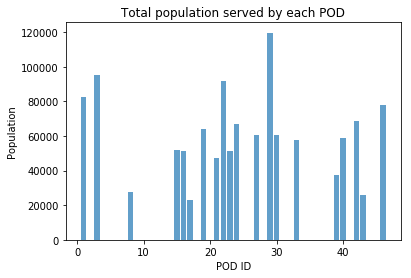

The average number of people served by a POD is 61,047 .


In [10]:
pods_open = pods_open.groupby("pod").population.sum().reset_index()

plt.bar(pods_open['pod'], pods_open['population'],align='center', alpha=0.7)
plt.ylabel('Population')
plt.xlabel('POD ID')
plt.title('Total population served by each POD')
plt.show()

print("The average number of people served by a POD is",  "{:,.0f}".format(np.average(pods_by_pop['population'])))

### Number of cars and distance between block group and PODs

In [14]:
# analysis on number of hhs with no car and distance between block group and POD
# avg distance between POD and its selected BGs

In [15]:
pods_open = pd.DataFrame(pods_total[num_pods_open])
pods_open.columns = ["bg","pod"]
pods_open.head()

,bg,pod
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3


In [64]:
bg_pod_dist = []
    
for i in np.arange(0,len(pods_open)):    
    bg_pod_dist.append(dist_miles.iloc[pods_open.iloc[i,0],(pods_open.iloc[i,1]-1)])

bg_pod_dist = pd.merge(pods_open, 
                pd.DataFrame(bg_pod_dist), 
                left_index=True, 
                right_index=True)

bg_pod_dist.columns = ["bg","pod","distance"]

In [65]:
bg_pod_dist = pd.merge(population,
                bg_pod_dist,
                left_on = 'bg_id',
                right_on = 'bg',
                how = 'left')

# calculate proportion of households with no car
bg_pod_dist['prop_hh_no_car'] = bg_pod_dist['hh_no_car']/bg_pod_dist['num_hhs']
bg_pod_dist.head()

,bg_id,census_geo_id,statefp,countyfp,tractce,blkgrpce,latitude,longitude,population,num_hhs,hh_no_car,hh_car,bg,pod,distance,prop_hh_no_car
0,1,1500000US420030103001,42,3,10300,1,40.434602,-79.993347,2510,0,0,0,1.0,3.0,9.571166,NaN
1,2,1500000US420030103002,42,3,10300,2,40.436130,-79.990873,3412,0,0,0,2.0,3.0,10.018893,NaN
2,3,1500000US420030103003,42,3,10300,3,40.437007,-79.982553,347,141,39,102,3.0,3.0,10.399206,0.276596
3,4,1500000US420030103004,42,3,10300,4,40.437364,-79.977217,399,179,58,121,4.0,3.0,9.495009,0.324022
4,5,1500000US420030201001,42,3,20100,1,40.438538,-80.001596,1717,347,47,300,5.0,3.0,9.865430,0.135447


     pod  hh_no_car
0    1.0       2774
1    3.0       8192
2    8.0       1124
3   15.0       1533
4   16.0       1206
5   17.0        935
6   19.0       5046
7   21.0       1144
8   22.0       3875
9   23.0        429
10  24.0       1669
11  27.0       5848
12  29.0      13955
13  30.0       6335
14  33.0       2051
15  39.0       2435
16  40.0       4156
17  42.0       1615
18  43.0        335
19  46.0       6492


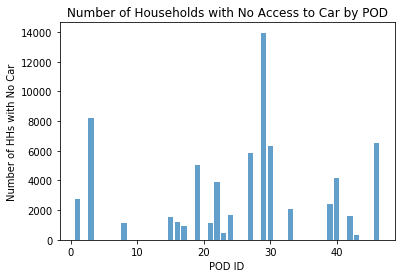

The average number of households with no car is 3,557
Of these PODs, POD X has the highest number of households with no car: 13,955
Of these PODs, POD X has the lowest number of households with no car is 335


In [82]:
pod_no_car = bg_pod_dist.groupby("pod").hh_no_car.sum().reset_index()
print(pod_no_car)

plt.bar(pod_no_car['pod'], pod_no_car['hh_no_car'],align='center', alpha=0.7)
plt.ylabel('Number of HHs with No Car')
plt.xlabel('POD ID')
plt.title('Number of Households with No Access to Car by POD')
plt.show()

# reword and edit/add POD id #
print("The average number of households with no car is",  "{:,.0f}".format(np.average(pod_no_car['hh_no_car'])))
print("Of these PODs, POD X has the highest number of households with no car:",  "{:,.0f}".format(np.max(pod_no_car['hh_no_car'])))
print("Of these PODs, POD X has the lowest number of households with no car is",  "{:,.0f}".format(np.min(pod_no_car['hh_no_car'])))

     pod  prop_hh_no_car
0    1.0        0.079565
1    3.0        0.206822
2    8.0        0.107264
3   15.0        0.065507
4   16.0        0.051702
5   17.0        0.082905
6   19.0        0.180768
7   21.0        0.067994
8   22.0        0.093460
9   23.0        0.025411
10  24.0        0.053452
11  27.0        0.197059
12  29.0        0.262568
13  30.0        0.235250
14  33.0        0.080625
15  39.0        0.155236
16  40.0        0.173428
17  42.0        0.054077
18  43.0        0.030155
19  46.0        0.194729


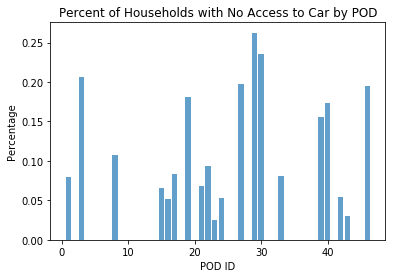

Average percentage of households with no car is 0.12 .
The POD with the highest percentage of households with no car is 0.26 by POD X.
The POD with the lowest percentage of households with no car is 0.03 by POD X.


In [84]:
pod_prop_no_car = bg_pod_dist.groupby("pod").prop_hh_no_car.mean().reset_index()
print(pod_prop_no_car)

plt.bar(pod_prop_no_car['pod'], pod_prop_no_car['prop_hh_no_car'],align='center', alpha=0.7)
plt.ylabel('Percentage')
plt.xlabel('POD ID')
plt.title('Percent of Households with No Access to Car by POD')
plt.show()

# reword and edit/add POD id #
print("Average percentage of households with no car is",  "{:,.2f}".format(np.average(pod_prop_no_car['prop_hh_no_car'])), ".")
print("The POD with the highest percentage of households with no car is",  "{:,.2f}".format(np.max(pod_prop_no_car['prop_hh_no_car'])), "by POD X.")
print("The POD with the lowest percentage of households with no car is",  "{:,.2f}".format(np.min(pod_prop_no_car['prop_hh_no_car'])), "by POD X.")

     pod   distance
0    1.0  12.914348
1    3.0   8.211246
2    8.0  18.432489
3   15.0  14.227429
4   16.0  20.654651
5   17.0  17.896709
6   19.0  15.789898
7   21.0   8.756288
8   22.0  15.436644
9   23.0  19.397512
10  24.0   7.137827
11  27.0  15.717260
12  29.0  19.584789
13  30.0   3.704170
14  33.0  27.660654
15  39.0  22.591727
16  40.0  13.346390
17  42.0   9.767141
18  43.0  14.019290
19  46.0   2.900236


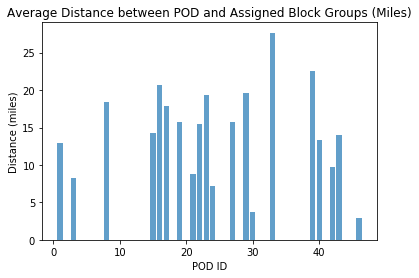

The average distance between a POD and Block Group is 14.41 miles
POD X has the lowest average distance betwee POD and block group at 2.90 miles
POD X has the highest average distance betwee POD and block group at 27.66 miles


In [79]:
pod_dist = bg_pod_dist.groupby("pod").distance.mean().reset_index()
print(pod_dist)

plt.bar(pod_dist['pod'], pod_dist['distance'],align='center', alpha=0.7)
plt.ylabel('Distance (miles)')
plt.xlabel('POD ID')
plt.title('Average Distance between POD and Assigned Block Groups (Miles)')
plt.show()

# add POD id #
print("The average distance between a POD and Block Group is",  "{:,.2f}".format(np.average(pod_dist["distance"])), "miles")
print("POD X has the lowest average distance between POD and block group at",  "{:,.2f}".format(np.min(pod_dist["distance"])), "miles")
print("POD X has the highest average distance between POD and block group at",  "{:,.2f}".format(np.max(pod_dist["distance"])), "miles")


### POD capacity

In [ ]:
# capacity_pod_all = [[N[j], i] for [j,i] in block_pod_list]

In [ ]:
# capacity_pod = {}
# for [N, i] in capacity_pod_all:
#     if i not in capacity_pod:
#         capacity_pod[i] = N
#     else:
#         capacity_pod[i] += N

In [ ]:
# max(capacity_pod.values())

In [ ]:
# min(capacity_pod.values())